In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# Data Wrangling

In [98]:
def wrangle(filename):
    df = pd.read_csv(filename)
    df.drop(columns=["Id"], inplace=True)
    # dropping outlier value indices is [15,1]df.drop(index=15, inplace=True)
    df.drop(index=15, inplace=True)

    
    return df

In [99]:
df=wrangle("Iris.csv")

In [100]:
df.isna().count() #checking non null values in all features 

SepalLengthCm    149
SepalWidthCm     149
PetalLengthCm    149
PetalWidthCm     149
Species          149
dtype: int64

# Pie chaert
checking if the data is equally distributed or not

<Axes: ylabel='Species'>

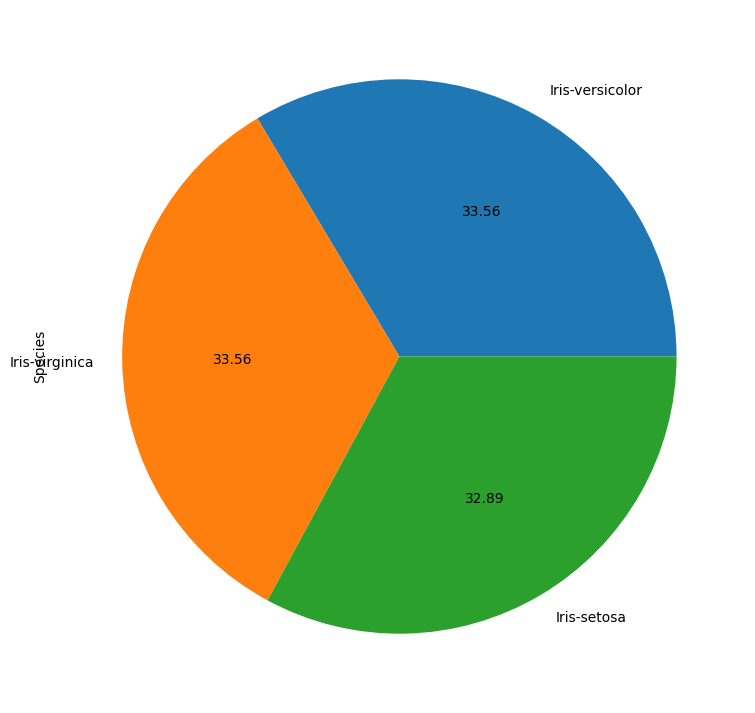

In [101]:
ax=plt.subplot()
df["Species"].value_counts().plot.pie(autopct="%.2f", figsize=(9, 9))

# checking Correlation 

In [102]:
correlation= df.select_dtypes("number").corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109370,0.875204,0.819851
SepalWidthCm,-0.109370,1.000000,-0.409417,-0.347337
PetalLengthCm,0.875204,-0.409417,1.000000,0.962598
PetalWidthCm,0.819851,-0.347337,0.962598,1.000000


In [103]:
# Visualizing correlation between the features using heatmap

<Axes: >

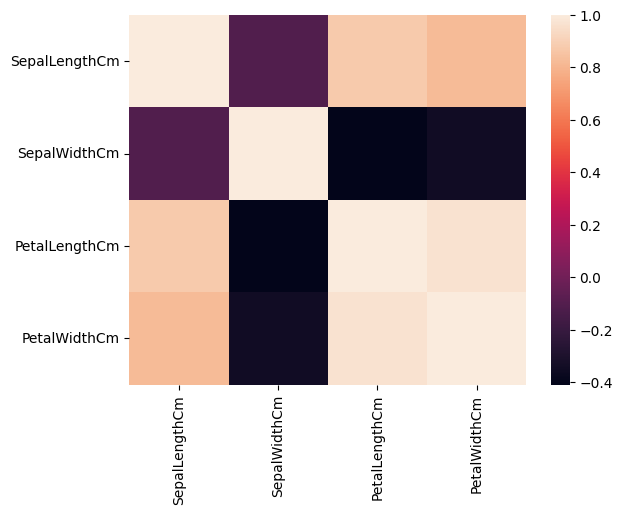

In [104]:
sns.heatmap(correlation)

# outlier detection and fixation

In [105]:
import numpy as np
import pandas as pd
from scipy import stats

In [106]:
z_scores = np.abs(stats.zscore(df.drop(columns=["Species"])))

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask for outliers
outlier_mask = (z_scores > threshold)

In [107]:
#counting the number of outliers in each feature 

In [108]:
outlier_count = outlier_mask.sum()
print(outlier_count)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [109]:
outlier_indices = np.column_stack(np.where(outlier_mask))

# Print the indices of outliers
print("Indices of outliers:")
print(outlier_indices)

Indices of outliers:
[]


In [110]:
X=df.drop(columns=["Species"])
y=df["Species"]


# splitting data into training and testing sets

In [111]:
# Split the oversampled data into train and test sets
from sklearn.model_selection import train_test_split

# Split the oversampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)  # Corrected print statement
print("y_test shape:", y_test.shape)  # Corrected print statement


X_train shape: (104, 4)
y_train shape: (104,)
X_test shape: (45, 4)
y_test shape: (45,)


# Calculating baseline accuracy for the model

In [112]:
acc_baseline =y_train.value_counts(normalize=True).max()

In [113]:
acc_baseline

0.3557692307692308

In [94]:
# Making Classifier

In [114]:
Model= DecisionTreeClassifier()

In [121]:
model_ir=Model.fit(X_train,y_train)

In [122]:
# calculating Cross validation accuracies

In [123]:
cv_scores = cross_val_score(model_ir, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Accuracy for each fold: [1.         0.95238095 1.         1.         0.95      ]
Mean Accuracy: 0.9804761904761905


In [124]:
# now predicting the values

In [125]:
RF_train_acc = accuracy_score(y_train,model_ir.predict(X_train))
RF_val_acc = accuracy_score(y_test,model_ir.predict(X_test))

In [129]:
RF_train_acc
RF_val_acc

0.9111111111111111

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
